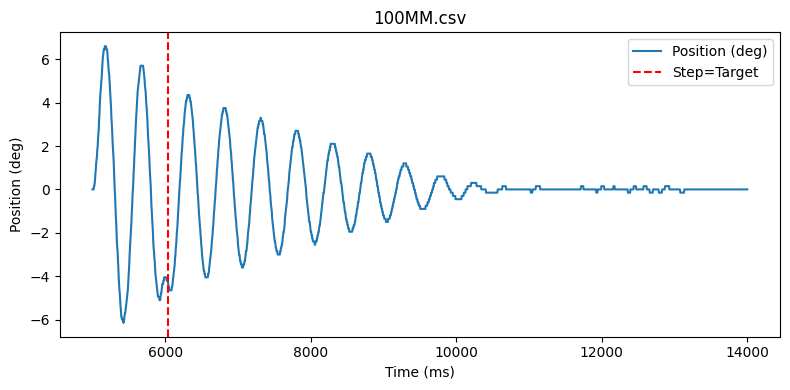

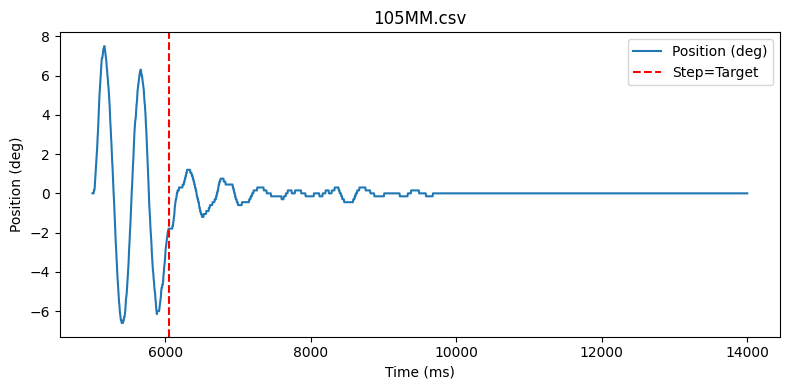

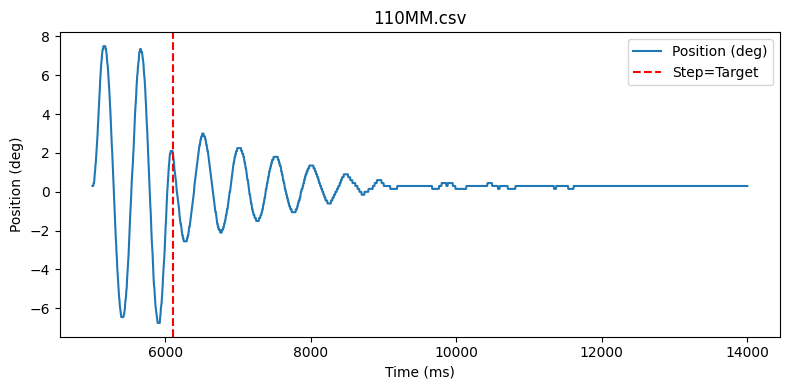

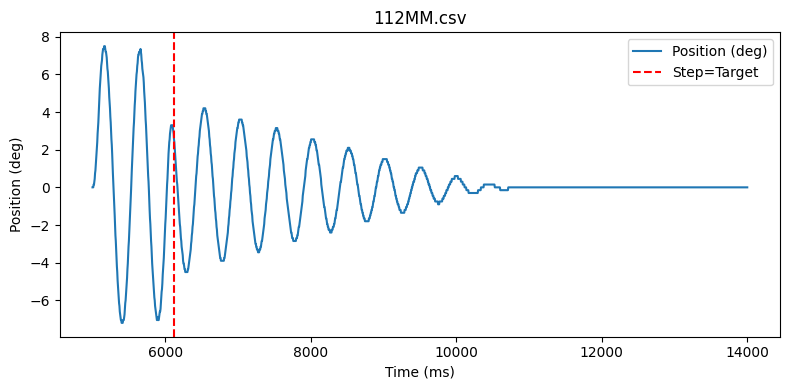

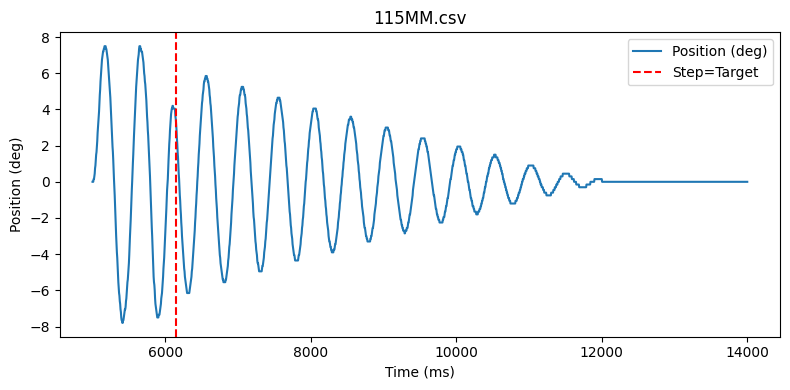

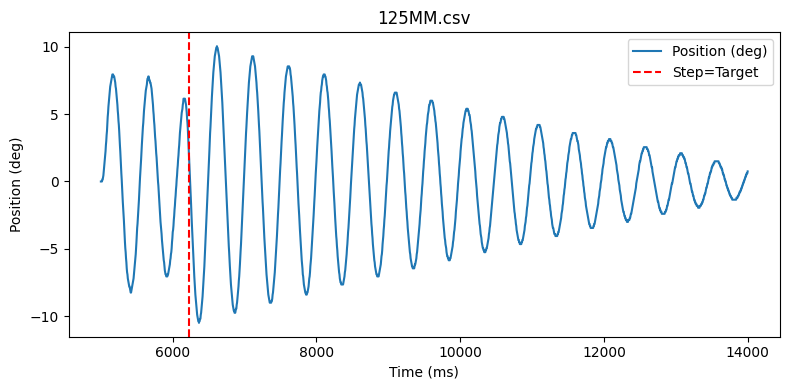

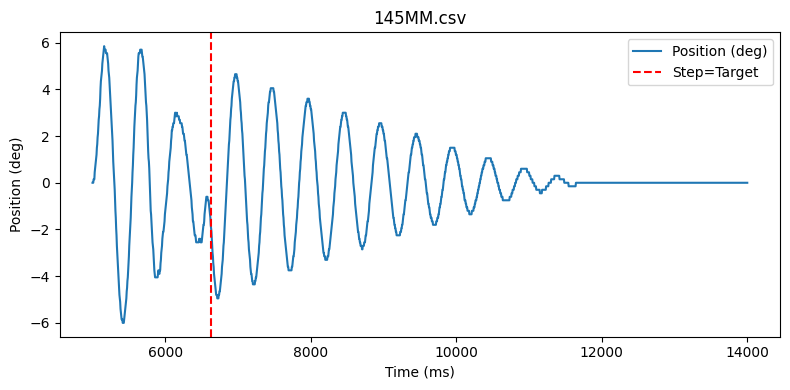

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
folder_path = r'Milestone 2 Deliverables\S2'  # <-- change this to your folder path

# ---------------- Process Each CSV ----------------
for filename in os.listdir(folder_path):
    if not filename.lower().endswith('.csv'):
        continue

    filepath = os.path.join(folder_path, filename)
    df = pd.read_csv(filepath)

    # Ensure required columns exist
    if not {'time_ms', 'position_step', 'position_deg', 'target_step'}.issubset(df.columns):
        print(f"Skipping {filename}: missing headers")
        continue

    # Find where position_step equals target_step
    match_idx = df.index[df['position_step'] == df['target_step']]
    if len(match_idx) > 0:
        match_time = df.loc[match_idx[0], 'time_ms']
    else:
        match_time = None

    # Extract the number before 'MM' from filename
    try:
        label = filename.split()[1]  # e.g., "115MM.csv" -> "115MM"
    except IndexError:
        label = filename.replace('.csv', '')

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df['time_ms'], df['position_deg'], label='Position (deg)', linewidth=1.5)
    if match_time is not None:
        plt.axvline(x=match_time, color='r', linestyle='--', label='Step=Target')
    plt.title(label)
    plt.xlabel('Time (ms)')
    plt.ylabel('Position (deg)')
    plt.legend()
    plt.tight_layout()
    plt.show()
